In [1]:
import cv2
import numpy as np
import os
import sys
sys.path.append('../../src')
import DISData as DD
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
doUT = DD.SQL()

host:  192.168.0.128
user:  diadmin
password:  ········


SQL connection done


In [3]:
data_name = 'frgc'

In [8]:
query = f'''select label_id, count(img_dir) as count from DeepInSight.{data_name}_landmark_info group by label_id;'''

In [9]:
db = doUT.db
conn = doUT.conn
conn.execute(query)
column_names = [desc[0] for desc in conn.description]
result = conn.fetchall()
db.commit()

In [13]:
df = pd.DataFrame(result, columns=column_names)
df['count'] = df['count'].astype('int64')
df['label_id'] = df['label_id'].astype('str')

In [14]:
df = df.sort_values(by='count',ascending=False)
df

,label_id,count
3,04202,30
0,02463,29
193,04530,28
169,04495,28
147,04461,28
...,...,...
8,04214,1
487,04864,1
99,04391,1
485,04862,1


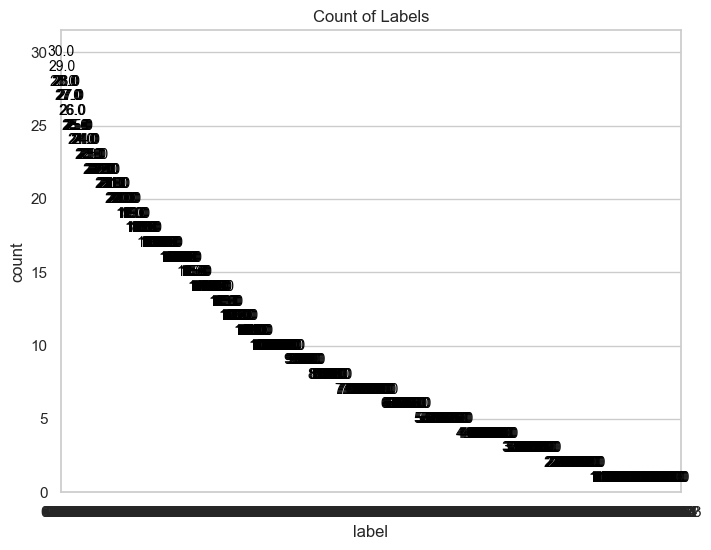

In [15]:
try:
    plt.figure(figsize=(8, 6))
    sns.set(style="whitegrid")
    ax = sns.barplot(x='label_id', y='count', data=df, hue='label_id')
    for p in ax.patches:
        label = p.get_height()  # 막대의 너비를 가져와서 count로 사용
        count = p.get_x() + p.get_width() / 2  # 막대의 y 좌표를 가져와서 label로 사용
        ax.annotate(f'{label}', (count, label), ha='center', va='center', fontsize=10, color='black')
    plt.xlabel('label')
    plt.ylabel('count')
    plt.title('Count of Labels')
    save_path = f'label/{data_name}_label.png'
    if not os.path.exists('label'):
        os.makedirs('label')
    if os.path.exists(save_path):
        os.remove(save_path)
    plt.savefig(save_path)
except Exception as e:
    print(e)